

# Projet 7 : Implémentez un modèle de scoring : LightGBM

L'objectif de ce notebook est d'évaluer notre classification avec LightGBM

[LightGBM](https://datascience.eu/fr/apprentissage-automatique/quest-ce-que-la-gbm-legere/) est un algorithme de machine learning basé sur le Gradient Boosting Machine (GBM), il est rapide, distribué, avec de grandes performances et repose sur des arbres de décisions.


Paramètres : 

- (max_depth) :  contrôle la distance maximale entre le nœud racine de chaque arbre et un nœud feuille. Diminuer max_depth réduit le temps d'entraînement. 
- (num_leaves):  définit le nombre maximal de nœuds par arbre. Diminuer num_leaves réduit le temps de entraînement.

## Importation des modules

In [1]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import shap

In [4]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns


## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import lightgbm as lgb

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer



## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle

## Warning
import warnings

In [5]:
warnings.filterwarnings("ignore")

##  Importation de données

In [6]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [8]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [9]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

## Mise en place du modèle

In [10]:
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier

In [11]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [12]:
accuracy= []
recall =[]
roc_auc= []
precision = []

lgbmc_3=LGBMClassifier(random_state=0,scale_pos_weight=1.1)

lgbmc_3.fit(X_train_smtomek, y_train_smtomek,categorical_feature = 'auto',eval_set=(X_test_smtomek, y_test_smtomek),feature_name='auto', verbose=0)

y_pred = lgbmc_3.predict(X_test_smtomek)

accuracy.append(round(accuracy_score(y_test_smtomek, y_pred),4))
recall.append(round(recall_score(y_test_smtomek, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test_smtomek, y_pred),4))
precision.append(round(precision_score(y_test_smtomek, y_pred),4))

model_names = ['LightGBM_adjusted_weight_3']
result_df8 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df8


clf=lgbmc_3

In [13]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, clf.predict(X_train_smtomek))}')

Accuracy: 0.7355607684016991
Precision: 0.7143599402481002
Recall: 0.7360637087599545


In [14]:
print(f'Accuracy: {accuracy_score(y_test_smtomek, clf.predict(X_test_smtomek))}')
print(f'Precision: {precision_score(y_test_smtomek, clf.predict(X_test_smtomek))}')
print(f'Recall: {recall_score(y_test_smtomek, clf.predict(X_test_smtomek))}')

Accuracy: 0.6651599528474452
Precision: 0.1457027094320831
Recall: 0.6513863590366322


In [15]:
y_pred=clf.predict(X_test_smtomek)

In [16]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test_smtomek)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_smtomek, y_pred)))

LightGBM Model accuracy score: 0.6652


In [17]:
y_pred_train = clf.predict(X_train_smtomek)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_smtomek, y_pred_train)))

Training-set accuracy score: 0.7356


In [18]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smtomek, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[75381 37742]
 [ 3445  6437]]

True Positives(TP) =  75381

True Negatives(TN) =  6437

False Positives(FP) =  37742

False Negatives(FN) =  3445


In [19]:
y_pred_bis = pd.DataFrame(y_pred, columns =['PRED'])

In [20]:
y_pred_bis

,PRED
0,1
1,0
2,0
3,0
4,1
...,...
123000,1
123001,0
123002,1
123003,0


In [21]:
y_train_bis = pd.DataFrame(y_train_smtomek)

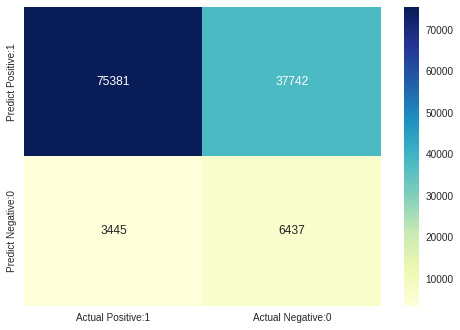

In [22]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [31]:
y_test=np.array(y_test_smtomek)

J'ai effectué ci-dessous la fonction de cout métier, elle marche hormis le fait que les vrais négatifs et vrais positifs sont inversés ci-dessous. Mais comme vous le voyez en dessous, j'ai demandé au programme d'appliquer moins un pour chaque vrai positif, et moins un pour chaque faux négatif et on a bien les memes résultats que dans la matrice de confusion (75381 - 3445 = 71936)

In [94]:
costtotal= []

for i in range(len(y_pred)):

    cost = 0 #Budget de la banque
    if y_pred[i] == 1 and y_test[i] == 1: #Vrais négatifs
          cost = cost
          costtotal.append(cost)
          
    if y_pred[i] == 1 and y_test[i] == 0: #Faux positifs
          cost = cost
          costtotal.append(cost)
    if y_pred[i] == 0 and y_test[i] == 0: #Vrais positifs
          cost = cost + 1
          costtotal.append(cost)
    if y_pred[i] == 0 and y_test[i] == 1: #Faux négatifs
          cost = cost - 1
          costtotal.append(cost)
         

In [95]:
sum(costtotal)

71936

Maintenant on applique pour un pret retourné un bénéfice via les interets de 10000 euros et pour chaque pret non remboursé une perte de 100000 euros, on obtient que la banque fait un bénéfice en fin d'année de 409 millions et 310 mille euros. Ce qui est très cohérent.

In [98]:
costtotal= []

for i in range(len(y_pred)):

    cost = 0 #Bénefice de la banque avant l'application des prets
    if y_pred[i] == 1 and y_test[i] == 1: #Vrais négatifs
          cost
          costtotal.append(cost)
          
    if y_pred[i] == 1 and y_test[i] == 0: #Faux positifs
          cost = cost
          costtotal.append(cost)
    if y_pred[i] == 0 and y_test[i] == 0: #Vrais positifs
          cost = cost + 10000
          costtotal.append(cost)
    if y_pred[i] == 0 and y_test[i] == 1: #Faux négatifs
          cost = cost - 100000
          costtotal.append(cost)

In [97]:
sum(costtotal)

409310000

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test_smtomek, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79    113123
           1       0.15      0.65      0.24      9882

    accuracy                           0.67    123005
   macro avg       0.55      0.66      0.51    123005
weighted avg       0.89      0.67      0.74    123005



In [101]:
from sklearn import metrics

In [102]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.6588747606291424

In [103]:
y_prob = clf.predict_proba(X_test_smtomek)[:,1] 

In [104]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7171569205145598

Text(0.5, 0, 'False Positive Rate')

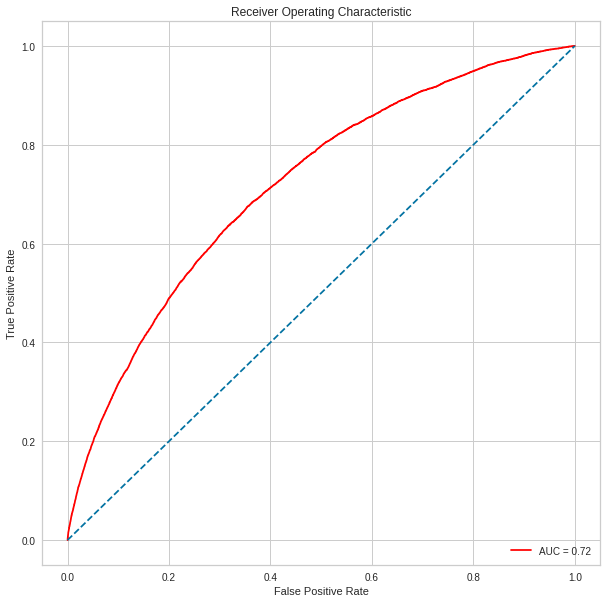

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Le score AUC est bon et relève d'un modèle dans l'ensemble performant et c'est la raison pour laquelle il est souvent utilisé dans les compétitions Kaggle.

De plus avec Beta étant égal à 40, le Fbeta score se rapproche de 0.65, ce qui est meilleur qu'avec SMOTE et démontre l'optimisation de notre fonction cout-métier.

Text(0.5, 1.0, 'Fbeta scores with beta 0 to 100')

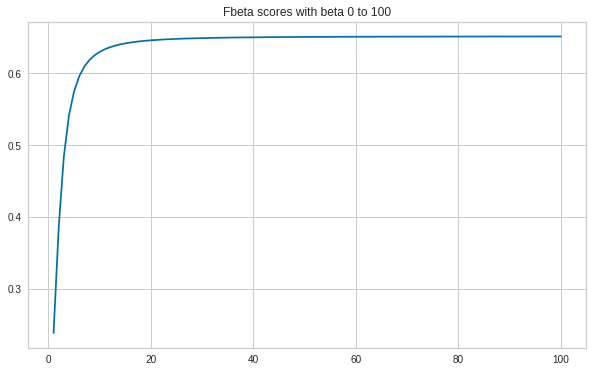

In [106]:
beta_score_list = []
for i in range(1,101):
    fbeta_results = fbeta_score(y_test_smtomek,y_pred,beta=i)
    beta_score_list.append(fbeta_results)
fig2 = plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,101),y=beta_score_list)
plt.title("Fbeta scores with beta 0 to 100")

## Feature Importance

In [107]:
pd.set_option('display.max_columns', None)
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
0,100002,1,Cash loans,M,0,202500.0,406597.5,Unaccompanied,working,low_educ,not_married,0.018801,-9461,-637,NaN,other,1.0,2,2,10,0,0.0149,2.0,1,1.0,Closed,-874.00,108131.945625,NaN,NaN,NaN,NaN,-20.421053,0.0,9251.775,179055.00,0.00,-606.000000,24.000000,365243.0,-25.000000,-17.000000,Approved,XAP,New,15.000000,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,Family,working,high_educ,married,0.003541,-16765,-1188,NaN,other,2.0,1,1,11,0,0.0714,0.0,1,0.0,Closed,-1400.75,254350.125000,NaN,NaN,NaN,NaN,-7.000000,0.0,56553.990,484191.00,3442.50,-1305.000000,10.000000,365243.0,-1054.333333,-1047.333333,Approved,XAP,Refreshed,4.909091,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,Unaccompanied,working,low_educ,not_married,0.010032,-19046,-225,26.0,other,1.0,2,2,9,0,NaN,0.0,0,0.0,Closed,-867.00,94518.900000,NaN,NaN,NaN,NaN,-3.000000,0.0,5357.250,20106.00,4860.00,-815.000000,4.000000,365243.0,-724.000000,-714.000000,Approved,XAP,New,0.000000,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,Unaccompanied,working,low_educ,married,0.008019,-19005,-3039,NaN,other,2.0,2,2,17,0,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,-19.375000,0.0,23651.175,291695.50,34840.17,-272.444444,23.000000,365243.0,182477.500000,182481.750000,Approved,XAP,Repeater,8.650000,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,Unaccompanied,working,low_educ,not_married,0.028663,-19932,-3038,NaN,other,1.0,2,2,11,1,NaN,0.0,0,0.0,Closed,-1149.00,146250.000000,NaN,NaN,NaN,NaN,-6.320000,0.0,12278.805,166638.75,3390.75,-1222.833333,20.666667,365243.0,72136.200000,72143.800000,Approved,XAP,Repeater,11.666667,0.0


In [108]:
from sklearn.inspection import permutation_importance

In [109]:
pd.set_option('display.max_columns', None)
dataset.sample(1000)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
203151,335517,0,Cash loans,F,0,157500.0,814041.0,Unaccompanied,working,low_educ,married,0.046220,-22650,-2337,NaN,other,2.0,1,1,14,0,0.5496,0.0,1,0.0,Closed,-1309.666667,126261.000000,NaN,NaN,NaN,NaN,-17.090909,0.000000,13294.440000,140850.000000,0.00,-147.333333,6.000000,365243.0,182605.000000,182606.0,Approved,XAP,Repeater,7.000000,0.000000
222426,357653,0,Cash loans,F,0,157500.0,278460.0,"Spouse, partner",working,low_educ,married,0.010032,-11963,-5037,NaN,other,2.0,2,2,5,0,0.1030,0.0,1,2.0,Closed,-1240.000000,144780.000000,NaN,NaN,NaN,NaN,-8.500000,0.000000,12851.408571,113180.318182,8326.35,-1632.727273,11.428571,365243.0,71733.000000,71743.4,Approved,XAP,Repeater,8.333333,0.000000
5169,106048,0,Revolving loans,F,2,90000.0,247500.0,Unaccompanied,working,low_educ,married,0.022800,-10624,-712,NaN,other,4.0,2,2,17,0,NaN,0.0,0,0.0,Active,-282.500000,85482.000000,NaN,NaN,NaN,NaN,-46.846154,0.000000,6715.890000,79830.000000,0.00,-515.000000,18.000000,365243.0,-318.500000,-310.0,Approved,XAP,New,13.875000,0.000000
248863,387901,0,Cash loans,F,0,135000.0,1205451.0,Unaccompanied,working,low_educ,married,0.007120,-16713,-381,NaN,other,2.0,2,2,15,0,NaN,0.0,1,1.0,Closed,-1194.909091,401190.136364,NaN,NaN,NaN,NaN,-3.583333,0.000000,16292.475000,304462.500000,2245.50,-1109.333333,13.333333,365243.0,-1225.500000,-1217.5,Approved,XAP,Refreshed,30.500000,0.000000
105347,222241,0,Cash loans,M,1,135000.0,522396.0,Unaccompanied,working,low_educ,married,0.009549,-11285,-3158,NaN,NaN,3.0,2,2,16,0,0.0078,0.0,1,3.0,Closed,-1716.571429,219936.214286,0.000,214.47000,0.0,0.0,-7.068966,0.000000,6054.862500,26124.000000,2200.50,-899.000000,8.000000,365243.0,-930.500000,-926.5,Approved,XAP,Repeater,6.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89945,204436,0,Cash loans,F,1,112500.0,450000.0,Unaccompanied,working,low_educ,not_married,0.018634,-14211,-222,14.0,other,2.0,2,2,19,1,NaN,0.0,1,2.0,Active,-1086.000000,495000.000000,NaN,NaN,NaN,NaN,-7.300000,0.000000,18992.415000,315796.500000,2121.75,-1519.333333,24.000000,365243.0,-1258.666667,-1253.0,Approved,XAP,Refreshed,26.000000,0.000000
66276,176864,0,Cash loans,F,0,90000.0,808650.0,Unaccompanied,working,low_educ,married,0.025164,-20215,365243,NaN,NaN,2.0,2,2,9,0,NaN,0.0,1,0.0,Closed,-1320.437500,105562.687500,NaN,NaN,NaN,NaN,-23.333333,0.000000,6458.625000,70195.500000,0.00,-1644.000000,15.000000,365243.0,-1386.000000,-1378.5,Approved,XAP,Refreshed,5.400000,0.000000
45443,152634,0,Cash loans,M,0,90000.0,127350.0,Unaccompanied,working,low_educ,not_married,0.008575,-14212,-1680,4.0,other,1.0,2,2,10,1,NaN,0.0,1,5.0,Closed,-596.000000,67500.000000,NaN,NaN,NaN,NaN,-2.709677,-796.167581,10327.950000,110587.500000,NaN,-423.500000,12.000000,273930.5,182458.750000,182463.5,Approved,XAP,Repeater,9.548387,0.483871
233148,370049,1,Cash loans,M,0,225000.0,820453.5,Family,working,low_educ,married,0.006207,-13574,-821,65.0,other,2.0,2,2,12,1,NaN,0.0,1,2.0,Closed,-1459.500000,26416.080000,157879.385,18028.60875,0.0,0.0,-9.200000,886.206600,9756.596250,80779.590000,11250.00,-851.000000,5.500

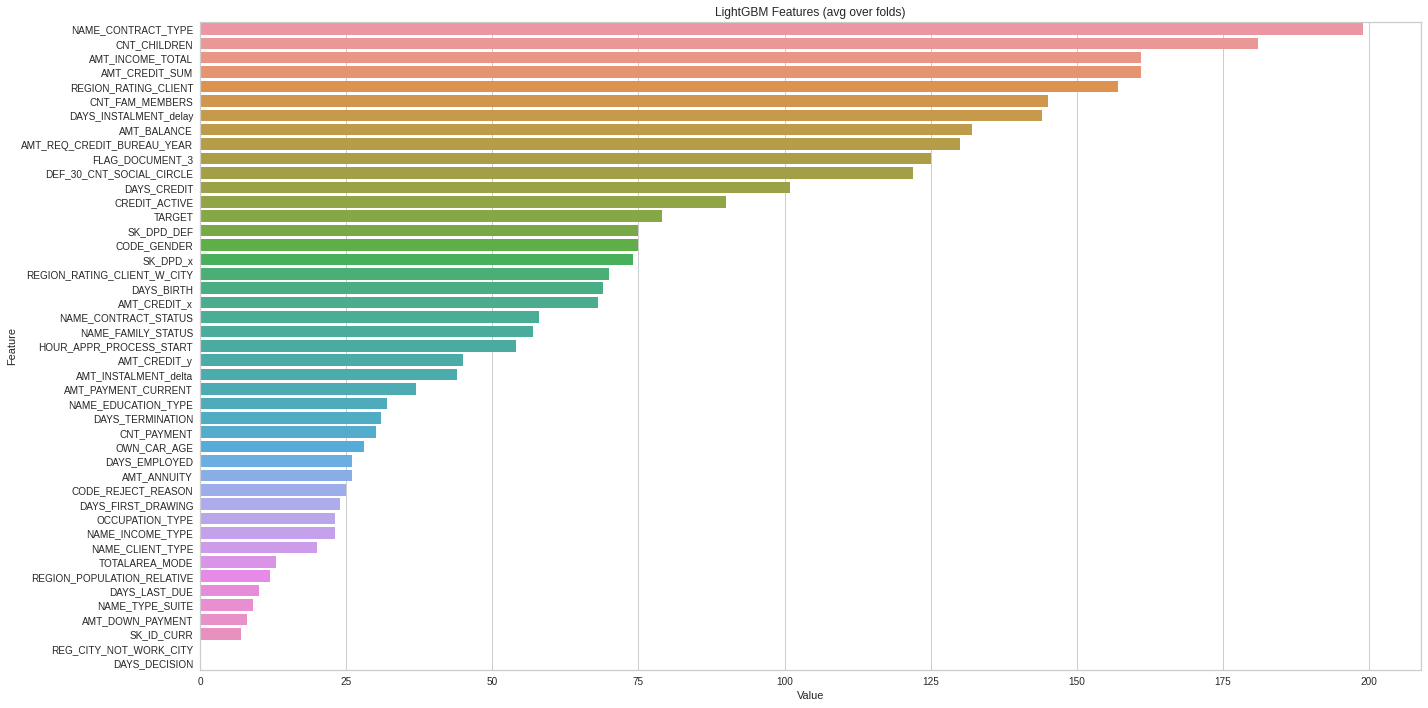

<Figure size 576x396 with 0 Axes>

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, dataset.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,dataset.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [111]:
#pickle_out = open(PATH + "LightGBMmodel.pkl", "wb")
#pickle.dump(clf, pickle_out)
#pickle_out.close()

In [112]:
prediction = clf.predict(X_test_smtomek)
print(prediction)

[1 0 0 ... 1 0 0]


In [113]:
dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

On va donc , dans le Notebook suivant, selectionner nos features importantes et ensuite réappliquer LightGBM dessus pour la mise en place de notre application.